<a href="https://colab.research.google.com/github/nihalhabeeb/Zomato_Restaurant_Clustering_And_Sentiment_Analysis/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [113]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
# Importing the datasets
restaurant_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Unsupervised ML-Nihal Habeeb/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Unsupervised ML-Nihal Habeeb/Zomato Restaurant reviews.csv')

### Dataset insights

#### Rastaurant Names and Metadata

In [115]:
restaurant_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [116]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


There are null values in the collections columns.

In [117]:
# number of unique values in each column
restaurant_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

#### Reviews data

In [118]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [119]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [120]:
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

There are some null values in most columns.

In [121]:
reviews_df.shape

(10000, 7)

In [122]:
# number of unique values in the columns
reviews_df.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

### Data Preprocessing

We can see the cost column contains the commas within the price value and it is string datatype. We can remove the commas and convert them into float datatype.

#### Rastaurant Names and Metadata

In [123]:
restaurant_df.head(2)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM


In [124]:
restaurant_df['Cost'][5]

'1,500'

In [125]:
type(restaurant_df['Cost'][5])

str

In [126]:
# replacing "," with "" (effectively removing commas) and converting the datatype to float
restaurant_df['Cost'] = restaurant_df['Cost'].str.replace(",","").astype('float64')

We will remove Links and Timings columns as they won't be used for the analysis.

In [127]:
# dropping columns
restaurant_df.drop(['Links','Timings'],axis=1,inplace=True)

The reviews dataset has the name of restaurants in "Restaurant" column. We will rename the column in this dataset as well.

In [128]:
restaurant_df.rename(columns={'Name':'Restaurant'},inplace=True)

In [129]:
restaurant_df.head(5)

,Restaurant,Cost,Collections,Cuisines
0,Beyond Flavours,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I..."
1,Paradise,800.0,Hyderabad's Hottest,"Biryani, North Indian, Chinese"
2,Flechazo,1300.0,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,800.0,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,1200.0,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med..."


#### Reviews dataset

In [130]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [131]:
reviews_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

We can see there is one value in the Rating column 'Like' which doesn't give any specific score. We can remove it.

In [132]:
# the row where Rating contains 'Like' value
reviews_df[reviews_df['Rating'] == 'Like']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


In [133]:
# dropping that row
reviews_df.drop(7601, axis = 0, inplace = True)

The Rating column values are string datatype. We can convert them into float.

In [134]:
type(reviews_df['Rating'][0])

str

In [135]:
# converting to float
reviews_df['Rating'] = reviews_df['Rating'].astype('float64')

The time column is in string format as well. We can convert them into datetime.

In [136]:
type(reviews_df['Time'][0])

str

In [137]:
# converting to datetime
import datetime
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'])

In [138]:
reviews_df.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0


### Handling Null Values

#### Restaurant data

In [139]:
# missing value percentage
(restaurant_df.isna().sum()/len(restaurant_df))*100

Restaurant      0.000000
Cost            0.000000
Collections    51.428571
Cuisines        0.000000
dtype: float64

The collection has more than 51 % missing values. The collection column describes the restaurant with Zomato's categories. The missing values can be replaced with "Unknown".

In [140]:
# Replacing null values
restaurant_df['Collections'].fillna('Unknown',inplace=True)

#### Reviews data

In [141]:
# missing value percentage
(reviews_df.isna().sum()/len(reviews_df))*100

Restaurant    0.000000
Reviewer      0.380038
Review        0.450045
Rating        0.380038
Metadata      0.380038
Time          0.380038
Pictures      0.000000
dtype: float64

The percentage of missing values is negligible and those rows can be simply dropped.

In [142]:
# Dropping the rows with missing values
reviews_df.dropna(inplace=True)

### Outlier Treatment

In [143]:
def remove_outlier(df,column):
  '''
  Remove outliers in the distribution. Scale the distribution to the standard normal distribution and remove
  every data points that are beyond 3 standard deviations (outliers). Boxplots and Distplots of the distribution
  is constructed before and after the outlier treatment.
  '''
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  plt.title('Before outlier treatment')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  # remove datapoints that are at or beyond 3 standard dev to the right
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() < 3]
  # remove datapoints that are at or beyond 3 standard dev to the left (negative)
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() > -3]
  
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  plt.title('After outlier treatment')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  return df

#### Restaurant dataset

There's only one numerical column in Restaurant dataset. We can scale it to standard normal distribution (z-distribution) and consider every data beyond 3 standard deviation as outliers using the function defined above.

In [144]:
restaurant_df.describe()

,Cost
count,105.000000
mean,861.428571
std,510.149730
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


In [145]:
restaurant_df[((restaurant_df['Cost'] - restaurant_df['Cost'].mean()) / restaurant_df['Cost'].std()).abs() > 3]

,Restaurant,Cost,Collections,Cuisines
56,Feast - Sheraton Hyderabad Hotel,2500.0,"Sunday Brunches, Great Breakfasts, Function Ve...","Modern Indian, Asian, Continental, Italian"
92,Collage - Hyatt Hyderabad Gachibowli,2800.0,Sunday Brunches,"Continental, Italian, North Indian, Chinese, A..."


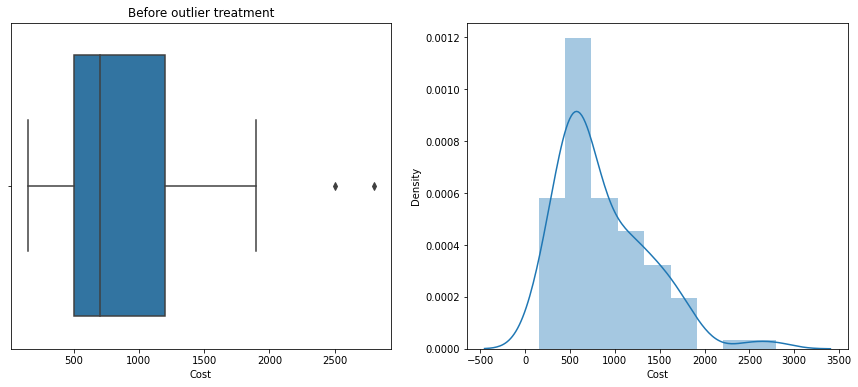

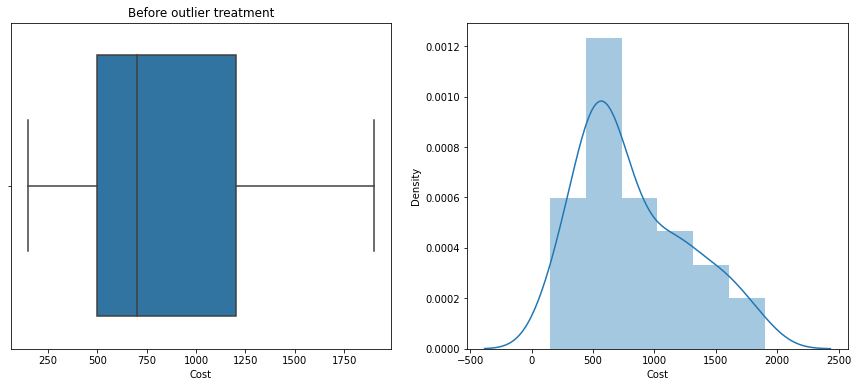

In [146]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.title('Before outlier treatment')
sns.boxplot(restaurant_df['Cost'])
plt.subplot(1, 2, 2)
sns.distplot(restaurant_df['Cost'])

# remove datapoints that are at or beyond 3 standard dev to the right
restaurant_df = restaurant_df[((restaurant_df['Cost'] - restaurant_df['Cost'].mean()) / restaurant_df['Cost'].std()).abs() < 3]
# remove datapoints that are at or beyond 3 standard dev to the left (negative)
restaurant_df = restaurant_df[((restaurant_df['Cost'] - restaurant_df['Cost'].mean()) / restaurant_df['Cost'].std()).abs() > -3]

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.title('Before outlier treatment')
sns.boxplot(restaurant_df['Cost'])
plt.subplot(1, 2, 2)
sns.distplot(restaurant_df['Cost'])

In [147]:
restaurant_df[((restaurant_df['Cost'] - restaurant_df['Cost'].mean()) / restaurant_df['Cost'].std()).abs() > 3]

,Restaurant,Cost,Collections,Cuisines


In [148]:
restaurant_df.shape

(103, 4)

#### Reviews dataset

In [149]:
reviews_df.describe()

,Rating,Pictures
count,9954.000000,9954.000000
mean,3.600261,0.751959
std,1.483573,2.575819
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,0.000000
max,5.000000,64.000000


There are two numerical columns in this dataset.

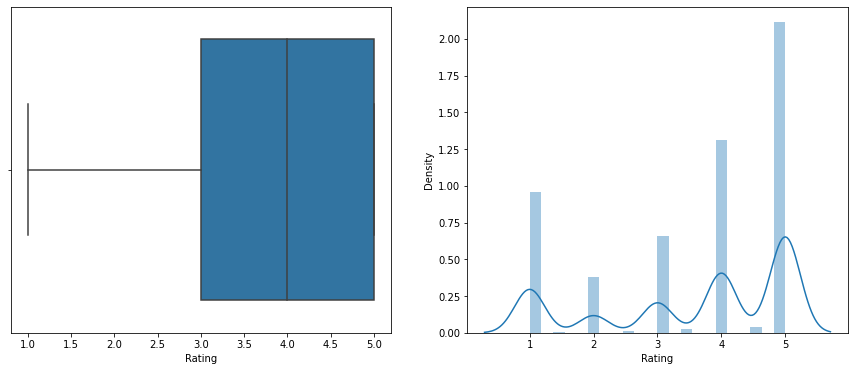

In [150]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
# plt.title('Before outlier treatment')
sns.boxplot(reviews_df['Rating'])
plt.subplot(1, 2, 2)
sns.distplot(reviews_df['Rating'])

The ratings column doesn't have any outliers.

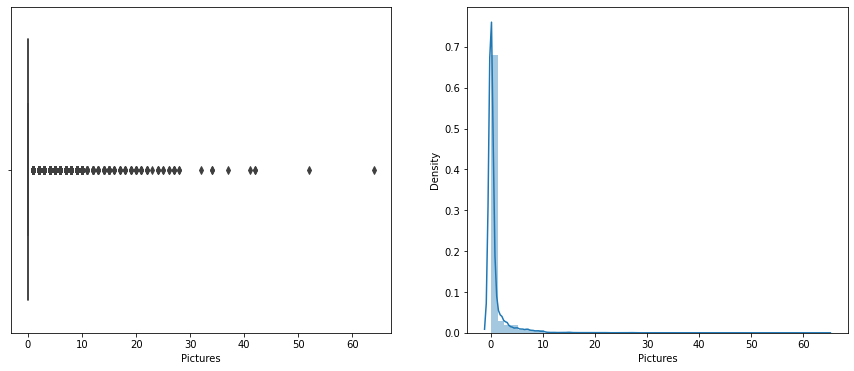

In [151]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
# plt.title('Before outlier treatment')
sns.boxplot(reviews_df['Pictures'])
plt.subplot(1, 2, 2)
sns.distplot(reviews_df['Pictures'])

In [152]:
reviews_df[((reviews_df['Pictures'] - reviews_df['Pictures'].mean()) / reviews_df['Pictures'].std()).abs() > 3].shape

(177, 7)

The pictures column has a lot of "outliers" but we don't want to remove a lot of data simply because they contained "unusual" number of pictures. So we decide to not remove those data.

### NLP

#### Removing stopwords and punctuation

In [153]:
# to remove stopwords 
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
# extracting the stopwords from nltk library
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [154]:
def remove_stopwords(text):
  '''Remove stopwords from input text'''
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

#remove punctuation
def remove_punctuation(text):
  '''Remove punctuation from input text'''
  import string
  # replacing the punctuations with '' (which effectively removes them)
  translator = str.maketrans('', '', string.punctuation)
  # return the text wihtout punctuation
  return text.translate(translator)

#### Collections column

In [155]:
restaurant_df['Collections'] = restaurant_df['Collections'].apply(remove_punctuation)

In [156]:
restaurant_df['Collections'] = restaurant_df['Collections'].apply(remove_stopwords)

In [157]:
restaurant_df.head(2)

,Restaurant,Cost,Collections,Cuisines
0,Beyond Flavours,800.0,food hygiene rated restaurants hyderabad corpo...,"Chinese, Continental, Kebab, European, South I..."
1,Paradise,800.0,hyderabads hottest,"Biryani, North Indian, Chinese"


#### Count vectorizer

In [158]:
from sklearn.feature_extraction.text import CountVectorizer

# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(restaurant_df['Collections']) 
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [159]:
#list to store vocab and count
vocab = []
count = []
#iterate through each vocab and count append the value to designated list
for key, value in dictionary:
  vocab.append(key)
  count.append(value)
#store the count in pandas dataframe with vocab as index
vocab_bef_stem = pd.Series(count,  index = vocab)
#store the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending = False)  

#### Stemming

In [160]:
# create an object of stemming function
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''Stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [161]:
restaurant_df['Collections'] = restaurant_df['Collections'].apply(stemming)

#### TF-IDF vectorizer

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfid vectorizer object
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data
# tfid_vectorizer.fit(restaurant_df['Collections'])   
tfidf_matrix = tfid_vectorizer.fit_transform(restaurant_df['Collections'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [163]:
# Lists to store the vocab and counts
vocab = []
count = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# Store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# Sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)

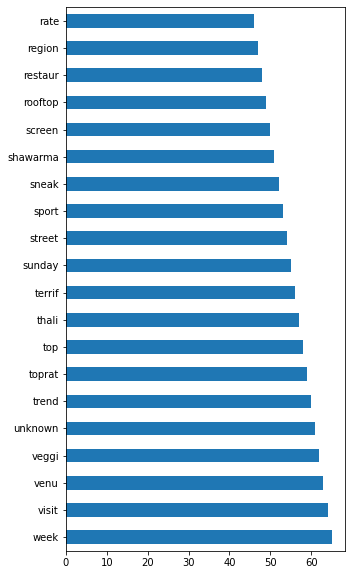

In [164]:
vocab_after_stem.head(20).plot(kind = 'barh', figsize = (5,10))

In [165]:
feature_names = tfid_vectorizer.get_feature_names()

vectorized_df = pd.DataFrame(tfidf_matrix.todense(), columns = feature_names)
vectorized_df

,bakeri,bar,barbecu,best,biryani,breakfast,brilliant,brunch,buffet,corpor,...,terrif,thali,top,toprat,trend,unknown,veggi,venu,visit,week
0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.235482,0.275654,...,0.0,0.0,0.0,0.287144,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.497416,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.300468,0.0,0.265468,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.286891,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
99,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
100,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
101,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0


#### Counting the number of words in collections

In [166]:
def length(text):   
  count = 0
  for i in range(len(text)):
    if text[i] == ' ':
        count = count + 1
        
  return count+1

In [167]:
restaurant_df['Collections_length'] = restaurant_df['Collections'].apply(length)

In [168]:
restaurant_df.head(2)

,Restaurant,Cost,Collections,Cuisines,Collections_length
0,Beyond Flavours,800.0,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...",15
1,Paradise,800.0,hyderabad hottest,"Biryani, North Indian, Chinese",2


#### Cuisines columns

In [169]:
restaurant_df.head(2)

,Restaurant,Cost,Collections,Cuisines,Collections_length
0,Beyond Flavours,800.0,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...",15
1,Paradise,800.0,hyderabad hottest,"Biryani, North Indian, Chinese",2


In [170]:
len(restaurant_df)

103

In [171]:
list_of_cuisines = restaurant_df['Cuisines'].str.split(', ')

In [172]:
type(list_of_cuisines[1])

list

In [173]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0
